In [6]:
#class info
class_names ={'Car': 1 , 'Van': 2 , 'Truck': 3 , 'Pedestrian': 4 , 'Cyclist': 5 , 'Tram': 6 , 'Misc': 7 , "None":0 }
n_classes = 8
not_selected= ['Person_sitting','DontCare']
#read the image folder and the file list
img_list = sorted(os.listdir("C:/Users/Safura/Downloads/archive (1)/kitti_single/training/image_2"))
base_txt_dir ="C:/Users/Safura/Downloads/archive (1)/kitti_single/training/label_2"
base_img_dir ="C:/Users/Safura/Downloads/archive (1)/kitti_single/training/image_2"

#read the text file and read the relevant data for the img bbox
final_data = []
for img_path  in img_list :
    file_txt = os.path.join(base_txt_dir , img_path.replace(".png" , ".txt"))
    with open(file_txt) as f :
        data = f.read()
        data = data.split("\n")[:-1]
        data_i = {}
        for idx , line in enumerate(data) :
            line_data = line.split()
            if(line_data[0] not in not_selected):
                clz = class_names[line_data[0]]
                # bbox coordinates  left, top, right, bottom
                lt_x  , lt_y = int(float(line_data[4] )) , int(float(line_data[5]))
                rb_x  , rb_y = int(float(line_data[6])) , int(float(line_data[7]))
                data_i[idx+1] = [clz , (lt_x , lt_y) , (rb_x , rb_y)]
        if(len(data_i) !=0):
            data_i[0] = os.path.join(base_img_dir , img_path)   
        f.close()
    if(len(data_i)!=0):
        final_data.append(data_i)

In [7]:
fig = plt.figure(figsize=(8,20))
rows = 2
cols = 2
def viz_sample(data):
    for idx in range(1, (cols*rows)):
        data_i = data[idx]
        img = cv2.imread(data_i[0])
        img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows , cols , idx)
        plt.imshow(img_rgb)
        plt.show()
        mask = np.zeros(img.shape[:-1] , dtype=np.uint8)
        for index , info in enumerate(data_i):
            if(index!=0):
                mask[data_i[index][1][1]:data_i[index][2][1]  , data_i[index][1][0] : data_i[index][2][0]  ] = 255
        fig.add_subplot(rows , cols , idx+1)
        plt.imshow(mask)
        plt.show()
    

<Figure size 576x1440 with 0 Axes>

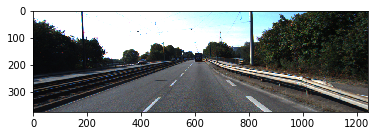

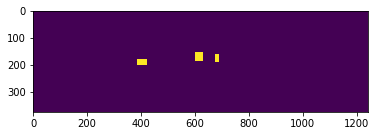

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


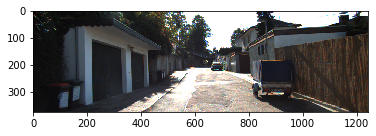

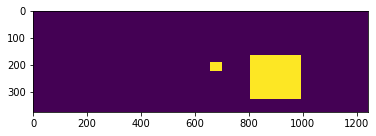

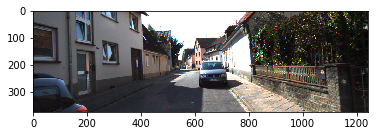

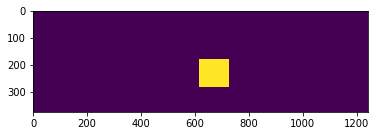

In [8]:
viz_sample(final_data)